In [1]:
from scipy.stats import norm
import scipy.integrate as integrate

x = norm
y = norm(loc=1,scale=10)

k = lambda z: abs(x.ppf(z)-y.ppf(z))

integrate.quad(k,0,1)

(7.225242419673555, 4.054826696631153e-09)

In [2]:
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np
import random

#random.seed(42)
#np.random.seed(0)

x = norm
y = norm.rvs(size=500)
y = ECDF(y)

def ppfecdf(ecdf,value):
    x = ecdf.x
    y = ecdf.y
    z = np.max(np.where(y<value))
    
    return x[z+1]

#print(ppfecdf(y,1))

#print(y.x)
#print(y.y)

k = lambda z: abs(x.ppf(z)-ppfecdf(y,z))
integrate.quad(k,0,1.0)


/home/enmidol/.local/lib/python3.6/site-packages/ipykernel_launcher.py:25: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.


(0.049878987384361514, 0.009624794755465902)

In [74]:
# Optimisation in one dimension

x = norm

k = lambda z: abs(x.ppf(z)-ppfecdf(ECDF(x.ppf(u)),z))

c = lambda u: integrate.quad(k,0,1)

def iterater(u):
    x = norm
    k = lambda z: abs(x.ppf(z)-ppfecdf(ECDF([x.ppf(u[0])]),z))

    return integrate.quad(k,0,1)[0]

x0=[0.4]
from scipy.optimize import minimize
res1 = minimize(iterater, x0, method='BFGS', tol=1e-6)
print(res1)

      fun: 0.7978845607940576
 hess_inv: array([[0.19871064]])
      jac: array([-4.02331352e-07])
  message: 'Optimization terminated successfully.'
     nfev: 10
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([0.50000084])


In [3]:
# Optimisation in two dimensions
from scipy.stats import norm, uniform, gamma, beta
x = norm

k = lambda z: abs(x.ppf(z)-ppfecdf(ECDF(x.ppf(u)),z))

c = lambda u: integrate.quad(k,0,1)

def iterater(u):
    x = beta(2,7)
    k = lambda z: abs(x.ppf(z)-ppfecdf(ECDF(x.ppf(u)),z))

    return integrate.quad(k,0,1)[0]

from scipy.optimize import minimize
bnds = ((0, 1), (0, 1), (0,1), (0,1))
x0=[0.2,0.3,0.4,0.6]
res = minimize(iterater, x0, method='SLSQP', bounds=bnds)
print(res1)
print(res)

/home/enmidol/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  del sys.path[0]


NameError: name 'res1' is not defined

NameError: name 'Z' is not defined

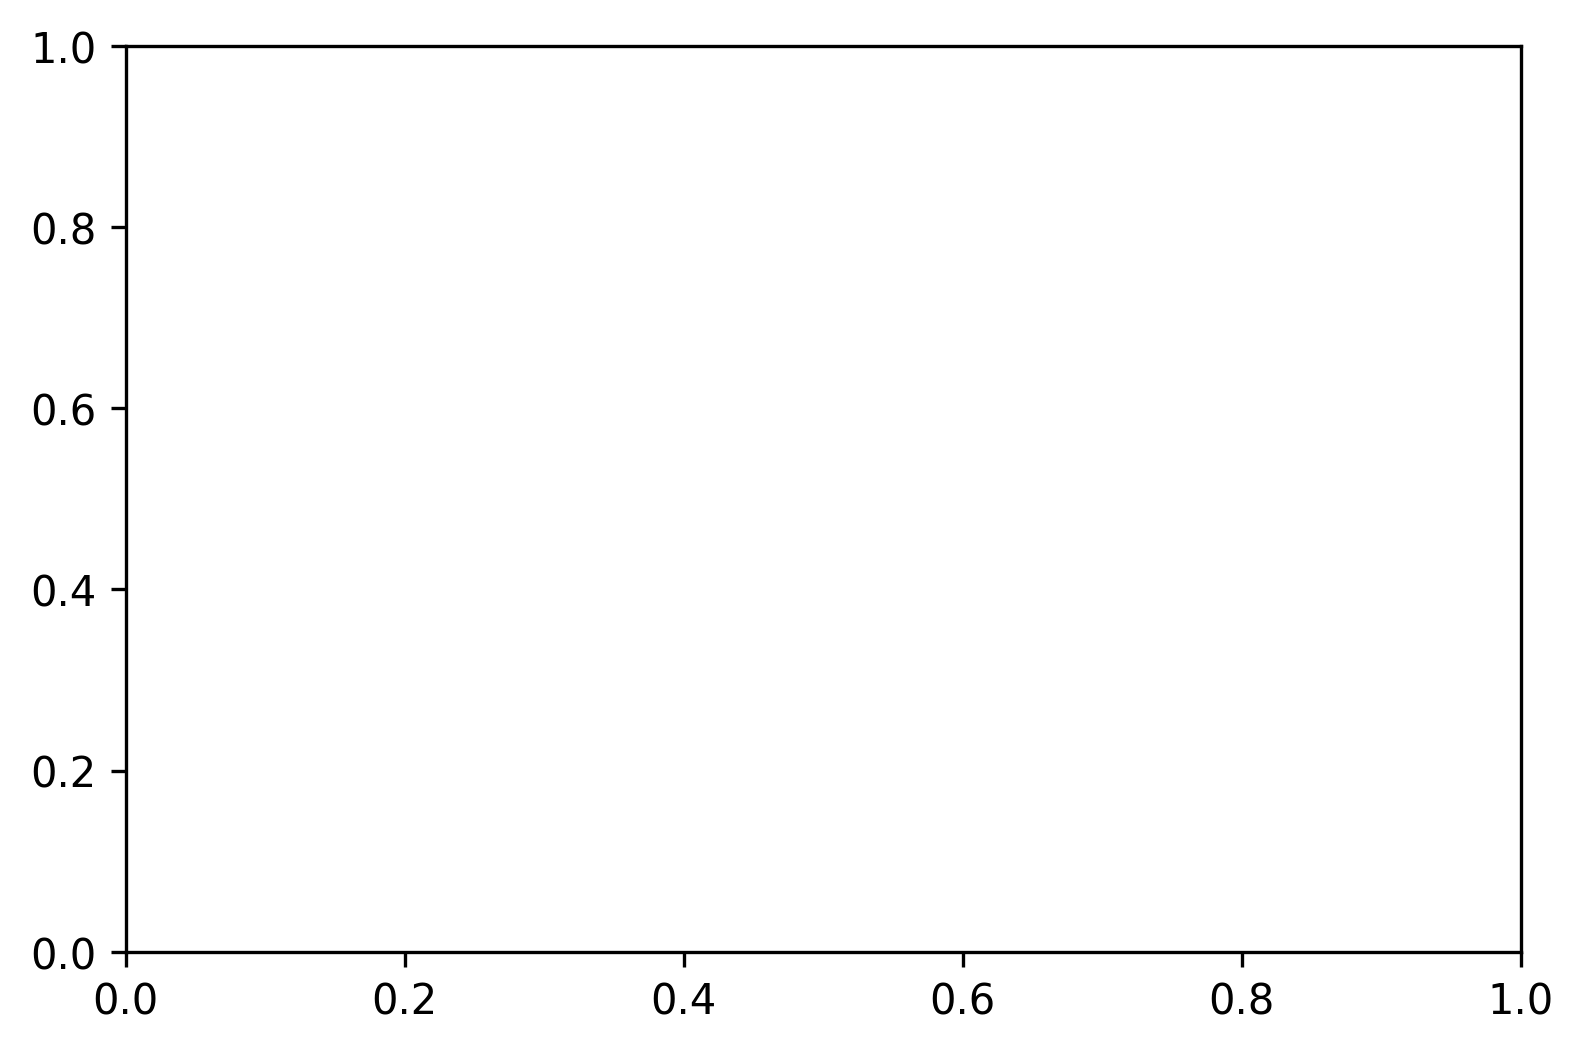

In [45]:
x = np.linspace(0, 1, 15)
y = np.linspace(0, 1, 15)

def iterater(a,b):
    x = norm
    k = lambda z: abs(x.ppf(z)-ppfecdf(ECDF(x.ppf([a,b])),z))

    return integrate.quad(k,0,1)[0]

X, Y = np.meshgrid(x, y)
Z = [[iterater(a,b) for a in x] for b in y]

%matplotlib inline
import matplotlib as mpl
dpi = 300
mpl.rcParams['figure.dpi']= dpi
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()
ax.contour(X, Y, Z, 50, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig
mpl.rc("savefig", dpi=dpi)
plt.show()

In [76]:
# Optimisation in three dimensions UNIFORM

from numba import generated_jit
from scipy.stats import norm, uniform, gamma, beta
import scipy.integrate as integrate
from statsmodels.distributions.empirical_distribution import ECDF

def ppfecdf(ecdf,value):
    x = ecdf.x
    y = ecdf.y
    z = np.max(np.where(y<value))
    
    return x[z+1]

k = lambda z: abs(x.ppf(z)-ppfecdf(ECDF(x.ppf(u)),z))

c = lambda u: integrate.quad(k,0,1)

def iterater(u):
    x = norm
    k = lambda z: abs(x.ppf(z)-ppfecdf(ECDF(x.ppf(u)),z))

    return integrate.quad(k,0,1)[0]

from scipy.optimize import minimize
bnds = ((0, 1), (0, 1), (0,1), (0,1), (0,1),(0,1)) * 10
x0=[0.16661066,0.83336914,0.50001839,0.6,0.5,0.33]
res = minimize(iterater, x0, method='SLSQP', bounds=bnds)
uniformoutput = res1
print(uniformoutput)
print(res)

ValueError: operands could not be broadcast together with shapes (6,) (60,) (60,) 

In [77]:
#madness

s = [(0,1) for i in range(0,20)]
s = tuple(s)
x0=[np.random.rand() for i in range(0,20)]
res = minimize(iterater, x0, method='SLSQP', bounds=s)
print(res)

/home/enmidol/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.


     fun: 0.06840322174375438
     jac: array([-0.00493498, -0.00703595,  0.00704596, -0.0004967 ,  0.00162303,
        0.00614254, -0.00556627,  0.0030603 , -0.00144815,  0.00018325,
       -0.00271321,  0.00553624,  0.0073891 , -0.00433828, -0.00198484,
        0.00362803, -0.00288158, -0.00112851,  0.00144635,  0.00060675])
 message: 'Optimization terminated successfully'
    nfev: 577
     nit: 26
    njev: 26
  status: 0
 success: True
       x: array([0.77448932, 0.82533345, 0.17428906, 0.27483716, 0.42502905,
       0.47561715, 0.97465155, 0.62539125, 0.32466475, 0.12445011,
       0.92462972, 0.02551778, 0.72578333, 0.87502693, 0.57572404,
       0.37587617, 0.07475333, 0.22521448, 0.67435022, 0.525918  ])


0.0005174450010175891 0.9880454983455537


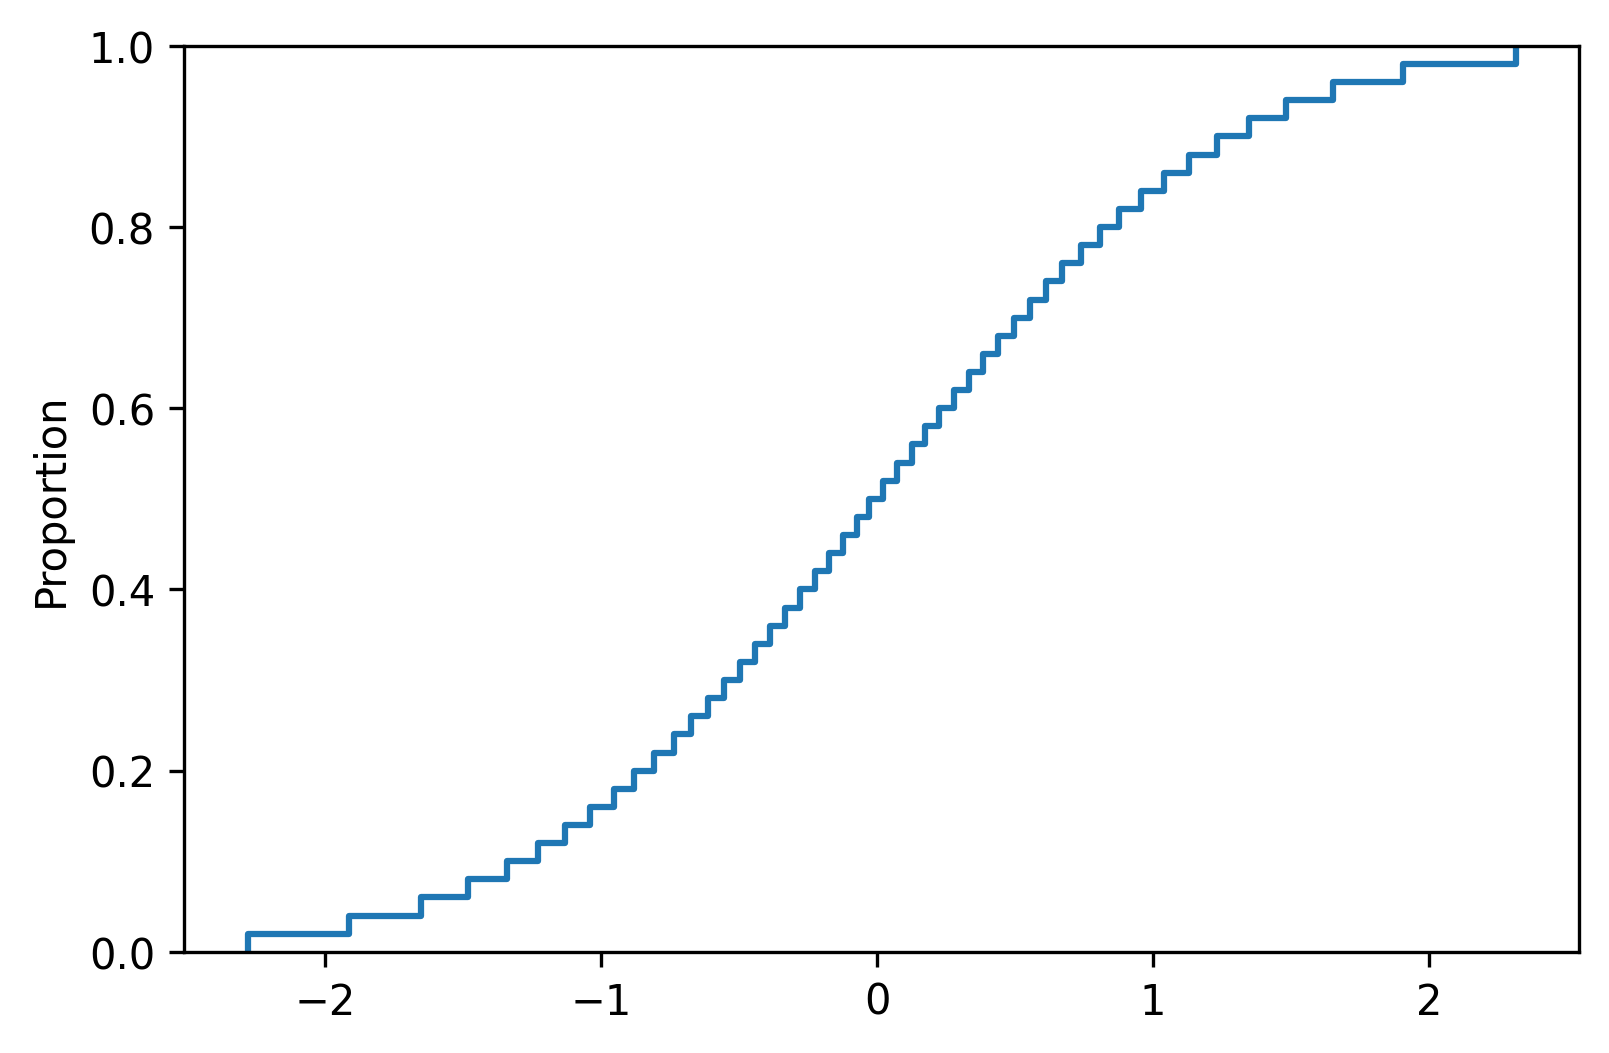

In [94]:
import areametric as am
import seaborn as sns

x = norm.rvs(size=10000)

y = [0.18964075, 0.17056606, 0.83023774, 0.8906033 , 0.04911613,
       0.20961803, 0.47081062, 0.60959761, 0.56969944, 0.36904905,
       0.54975138, 0.77015758, 0.01130819, 0.4890216 , 0.80954969,
       0.27049904, 0.28935563, 0.3104531 , 0.45112858, 0.10944511,
       0.58920446, 0.12942136, 0.6903052 , 0.71011115, 0.23061728,
       0.72920321, 0.06943929, 0.50907877, 0.43074374, 0.79047556,
       0.02790947, 0.32963225, 0.85079881, 0.7490068 , 0.34944695,
       0.09017163, 0.63045875, 0.87104741, 0.64987975, 0.5287513 ,
       0.9108916 , 0.41090836, 0.93053431, 0.38992123, 0.95060738,
       0.98966308, 0.9717459 , 0.6692851 , 0.24978275, 0.14959294]

sns.ecdfplot(norm.ppf(y))

z = norm.ppf(y)

print(np.mean(z), np.std(z))

Text(0.5, 1.0, 'LHS')

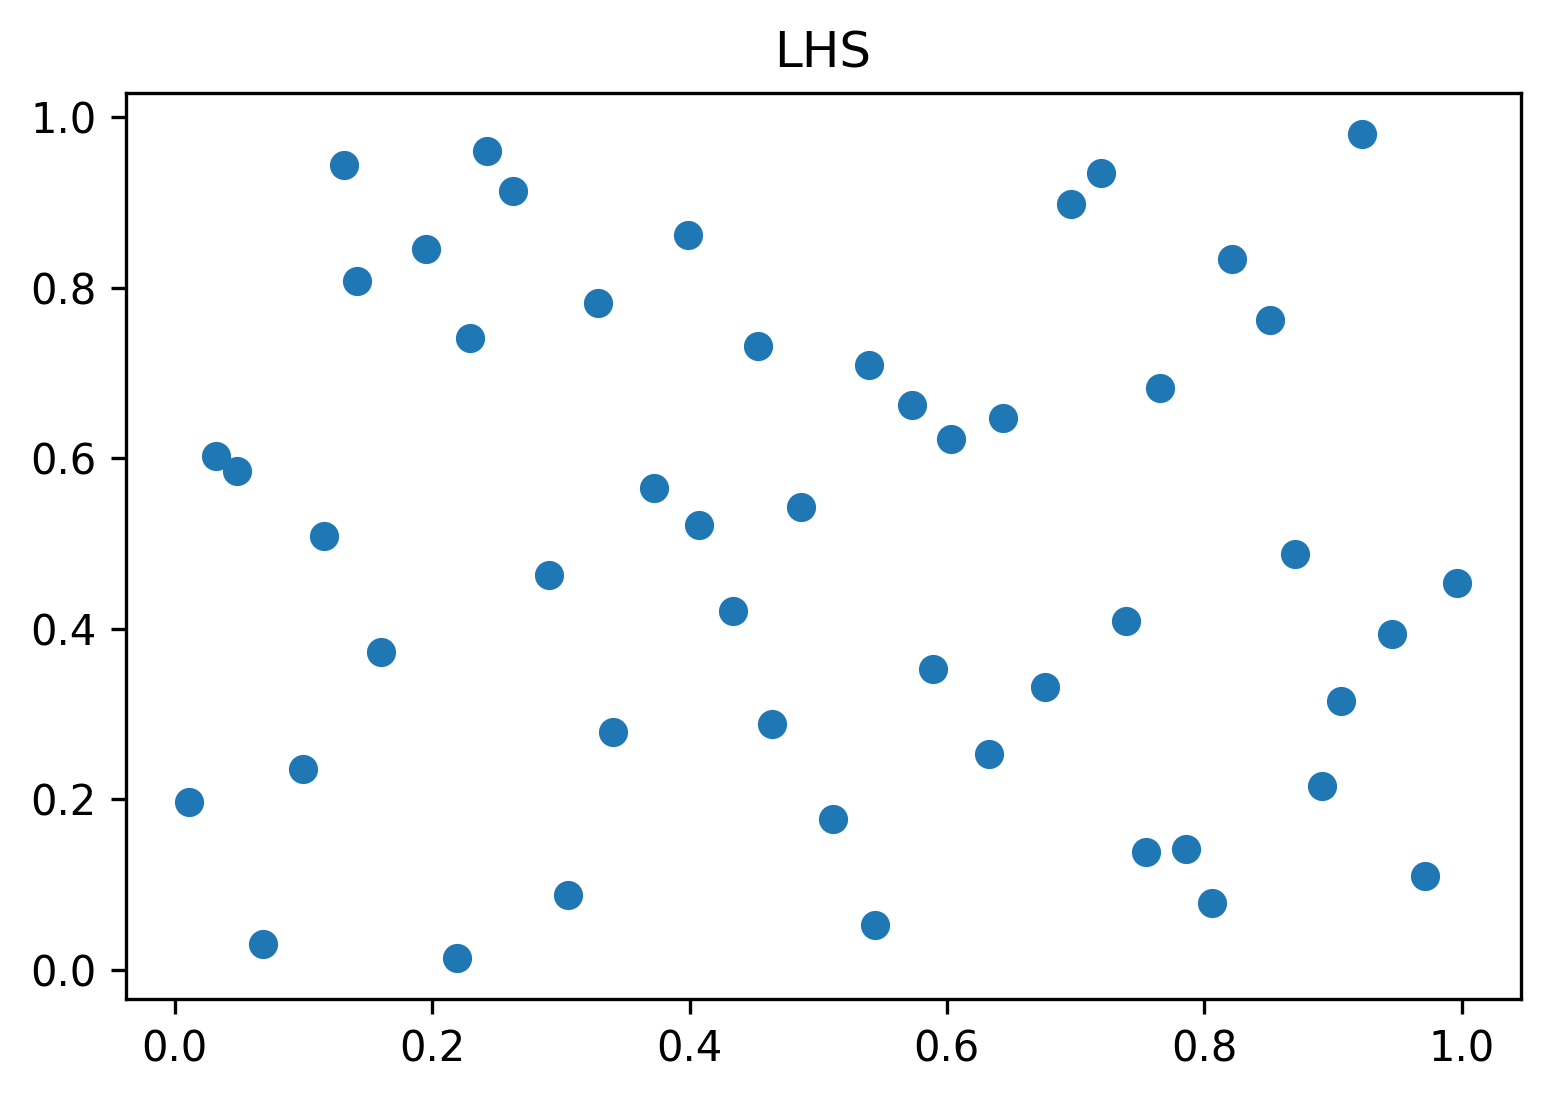

In [60]:
#LHS plot
from pyDOE import *
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import areametric as am
import numpy as np

random.seed(42)
np.random.seed(0)

lhd = lhs(2, samples=50)
#lhd = norm(loc=0, scale=1).ppf(lhd)
plt.scatter(lhd[:,0],lhd[:,1])
plt.title("LHS")

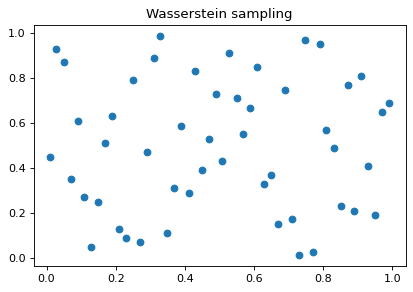

In [58]:
#Wass plot merged randomly
random.seed(42)
np.random.seed(0)

x = [0.18964075, 0.17056606, 0.83023774, 0.8906033 , 0.04911613,
       0.20961803, 0.47081062, 0.60959761, 0.56969944, 0.36904905,
       0.54975138, 0.77015758, 0.01130819, 0.4890216 , 0.80954969,
       0.27049904, 0.28935563, 0.3104531 , 0.45112858, 0.10944511,
       0.58920446, 0.12942136, 0.6903052 , 0.71011115, 0.23061728,
       0.72920321, 0.06943929, 0.50907877, 0.43074374, 0.79047556,
       0.02790947, 0.32963225, 0.85079881, 0.7490068 , 0.34944695,
       0.09017163, 0.63045875, 0.87104741, 0.64987975, 0.5287513 ,
       0.9108916 , 0.41090836, 0.93053431, 0.38992123, 0.95060738,
       0.98966308, 0.9717459 , 0.6692851 , 0.24978275, 0.14959294]

y = [0.18964075, 0.17056606, 0.83023774, 0.8906033 , 0.04911613,
       0.20961803, 0.47081062, 0.60959761, 0.56969944, 0.36904905,
       0.54975138, 0.77015758, 0.01130819, 0.4890216 , 0.80954969,
       0.27049904, 0.28935563, 0.3104531 , 0.45112858, 0.10944511,
       0.58920446, 0.12942136, 0.6903052 , 0.71011115, 0.23061728,
       0.72920321, 0.06943929, 0.50907877, 0.43074374, 0.79047556,
       0.02790947, 0.32963225, 0.85079881, 0.7490068 , 0.34944695,
       0.09017163, 0.63045875, 0.87104741, 0.64987975, 0.5287513 ,
       0.9108916 , 0.41090836, 0.93053431, 0.38992123, 0.95060738,
       0.98966308, 0.9717459 , 0.6692851 , 0.24978275, 0.14959294]
np.random.shuffle(x)
np.random.shuffle(y)
plt.scatter(x,y)
plt.title("Wasserstein sampling")
plt.show()

Text(0.5, 1.0, 'Random sampling')

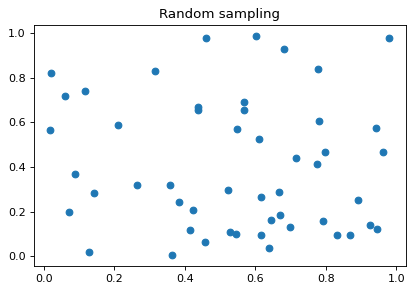

In [59]:
#MC sampling
random.seed(42)
np.random.seed(0)

x = [np.random.rand() for i in range(0,50)]
y = [np.random.rand() for i in range(0,50)]

plt.scatter(x,y)
plt.title("Random sampling")

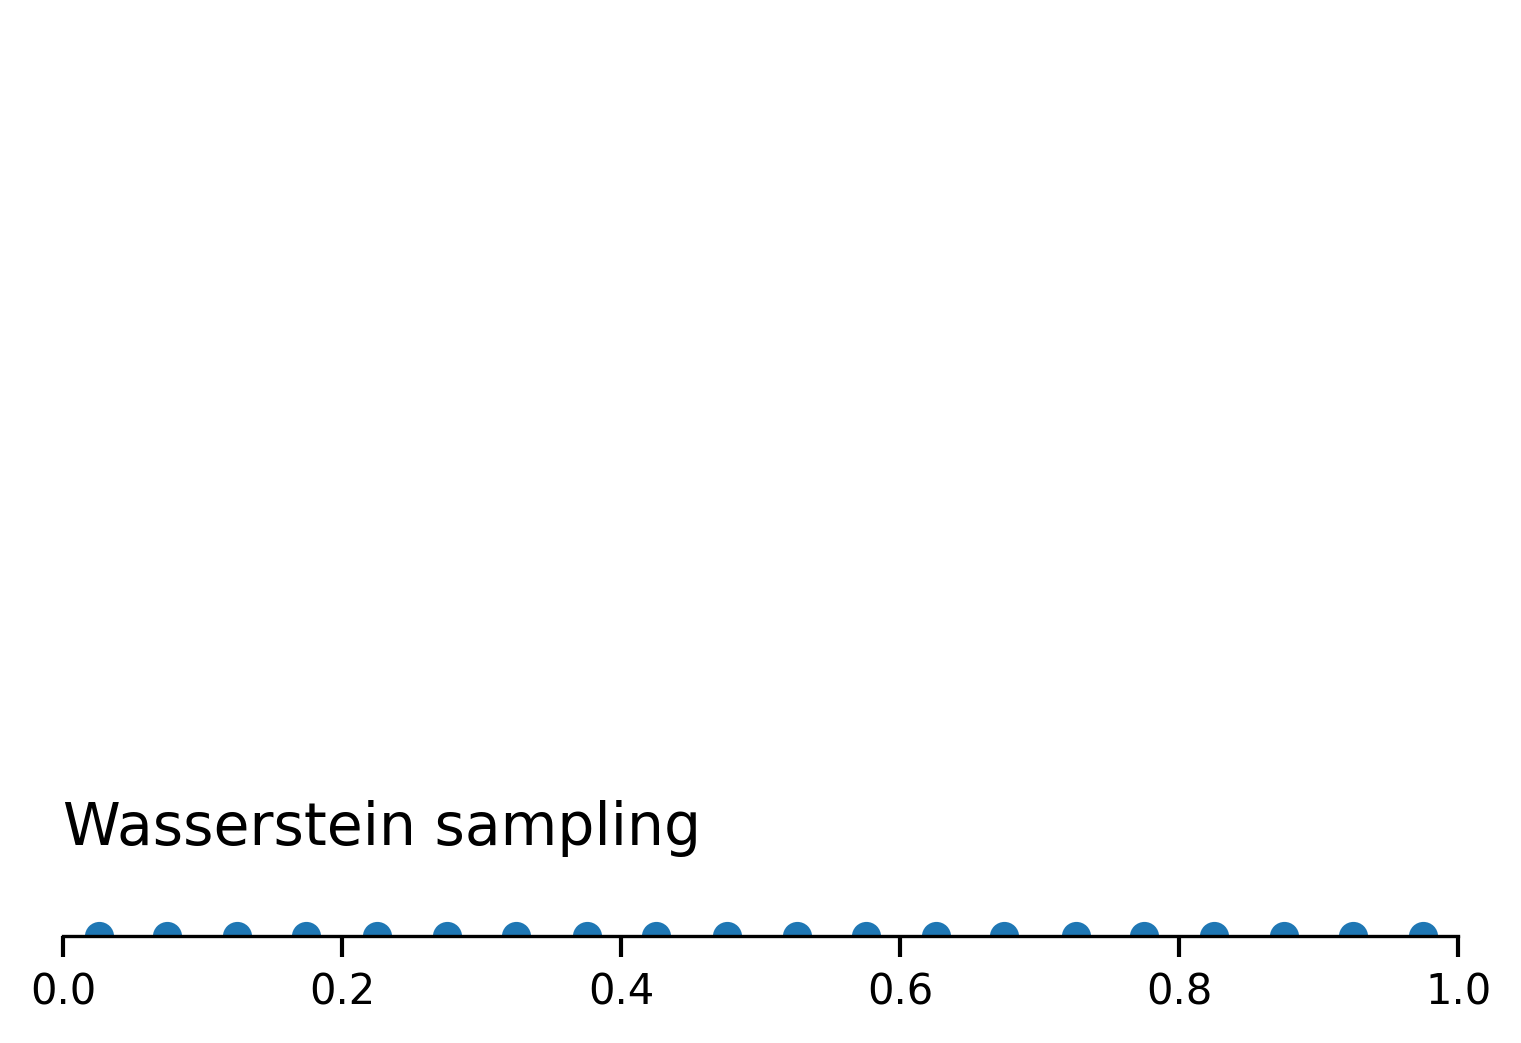

In [89]:
#Halton sampling

import matplotlib.ticker as ticker

from statsmodels.tools.sequences import halton
import matplotlib.pyplot as plt
from scipy.stats import norm

def setup(ax):
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.00)
    ax.tick_params(which='major', length=5)
    ax.tick_params(which='minor', width=0.75)
    ax.tick_params(which='minor', length=2.5)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.patch.set_alpha(0.0)
x =[0.77448932, 0.82533345, 0.17428906, 0.27483716, 0.42502905,
       0.47561715, 0.97465155, 0.62539125, 0.32466475, 0.12445011,
       0.92462972, 0.02551778, 0.72578333, 0.87502693, 0.57572404,
       0.37587617, 0.07475333, 0.22521448, 0.67435022, 0.525918]
fig, ax = plt.subplots()
setup(ax)
ax.scatter(x,[0] * 20)
ax.text(0.0, 0.1, "Wasserstein sampling", fontsize=14, transform=ax.transAxes)
plt.show()

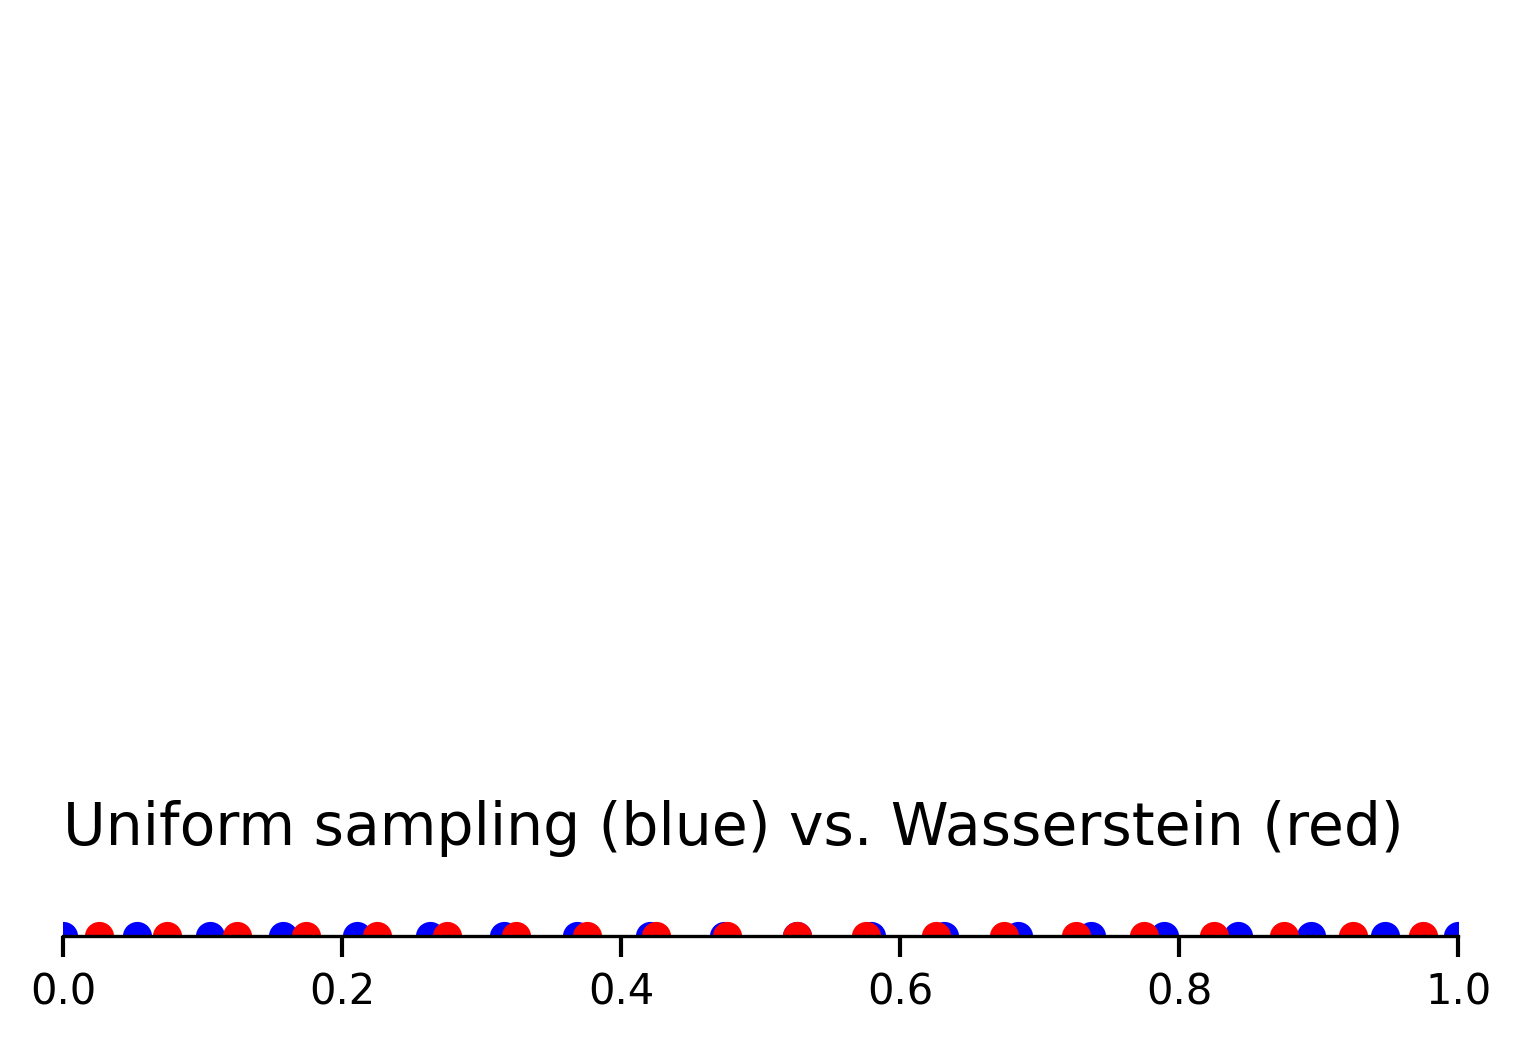

In [91]:
zz = np.linspace(0,1,20)
fig, ax = plt.subplots()
setup(ax)
plt.scatter(zz,[0] * 20,c='blue')
plt.scatter(x,[0] * 20,c='red')
ax.text(0.0, 0.1, "Uniform sampling (blue) vs. Wasserstein (red)", fontsize=14, transform=ax.transAxes)
plt.show()

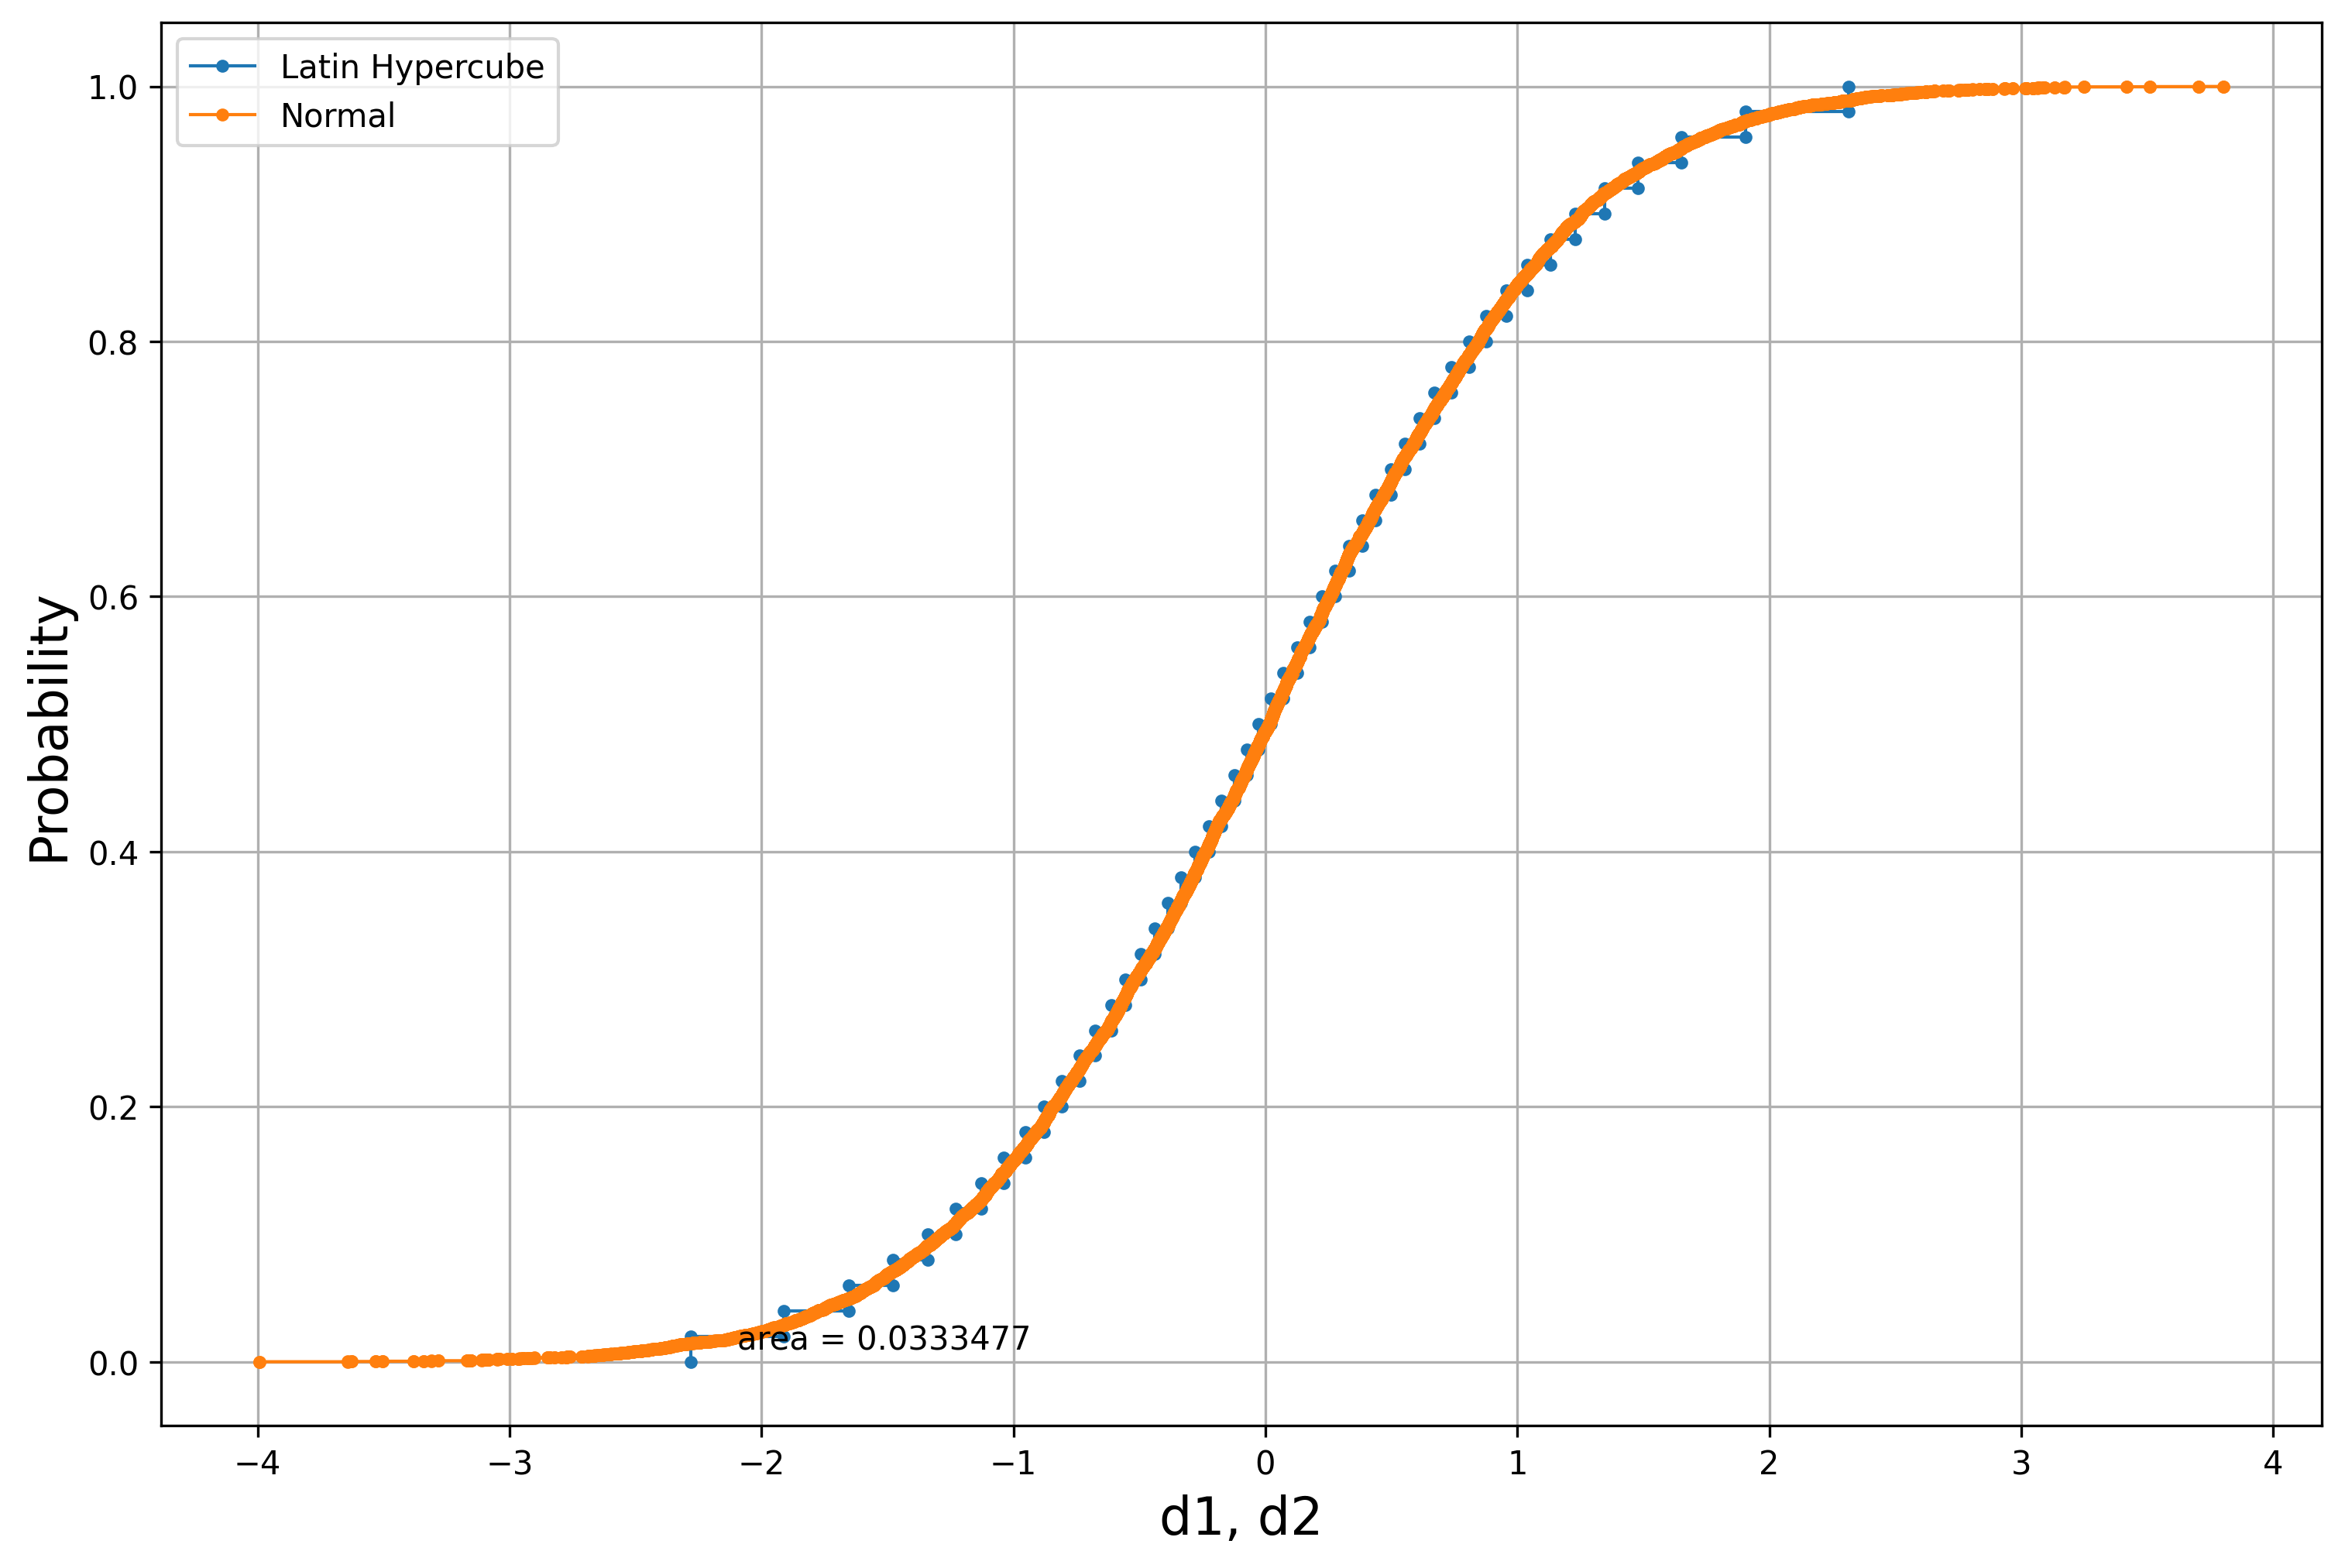

In [96]:
import areametric as am
x = [0.18964075, 0.17056606, 0.83023774, 0.8906033 , 0.04911613,
       0.20961803, 0.47081062, 0.60959761, 0.56969944, 0.36904905,
       0.54975138, 0.77015758, 0.01130819, 0.4890216 , 0.80954969,
       0.27049904, 0.28935563, 0.3104531 , 0.45112858, 0.10944511,
       0.58920446, 0.12942136, 0.6903052 , 0.71011115, 0.23061728,
       0.72920321, 0.06943929, 0.50907877, 0.43074374, 0.79047556,
       0.02790947, 0.32963225, 0.85079881, 0.7490068 , 0.34944695,
       0.09017163, 0.63045875, 0.87104741, 0.64987975, 0.5287513 ,
       0.9108916 , 0.41090836, 0.93053431, 0.38992123, 0.95060738,
       0.98966308, 0.9717459 , 0.6692851 , 0.24978275, 0.14959294]
x=norm.ppf(x)
normality = norm.rvs(loc=0,scale=1,size=10000)
am.plot(list(x), list(normality))